<a href="https://colab.research.google.com/github/isabelapt/Bootcamp_Data_Science_Alura/blob/main/Modulo_2/Modulo2Aula4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

Google Colab already has most common python packages.

  - You can pip install anything by prepending an exclamation point 

  - You can use pip to install this library:

```
!pip install beautifulsoup4
!pip install urlopen
```

In [ ]:
# Gastos Hospitalares 2008 - 2021
URL = 'https://raw.githubusercontent.com/isabelapt/Bootcamp_Data_Science_Alura/main/data/A174626189_28_143_208.csv'

In [ ]:
# Lê um arquivo csv e retorna em formato de DataFrame
dados = pd.read_csv(
    URL,
    encoding="ISO-8859-1",
    # skiprows manda pular as linhas iniciais
    skiprows = 3,
    # sep indica qual o caractere utilizado como separador
    sep=";",
    # skipfooter manda pular as linhas finais
    skipfooter=12,
    # thousands indica qual o caractere a ser reconhecido como o separador de milhares nos campos numéricos
    thousands=".",
    # decimal indica qual o caractere a ser reconhecido como o separador decimal nos campos numéricos
    decimal=",",
    engine='python'
)

pd.options.display.float_format = "{:.2f}".format

# Mostra as 5 primeiras linhas do DataFrame
display(dados.head())

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9222010.60,7493901.30,8148169.46,7353768.37,7739864.47,9246097.96,11824687.13,11735462.95,10201985.14,7955139.45,9358460.86,8883298.53,9630340.52,9096438.36,11749490.28,10420414.57,1009293149.05
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,3640142.82,3391242.21,4044321.44,3276590.10,3696997.31,3715723.12,3538427.92,4077045.92,6307616.67,456356147.14
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15788848.91,15784686.14,14388606.82,16063450.73,14939977.20,15107056.74,13540590.64,19698748.89,21129394.43,19769460.14,18059931.43,17841015.63,16408315.10,19895617.91,17786684.95,21522871.13,26002822.25,23189723.50,21844013.34,1940455216.35
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84,2860584.22,2740088.01,2689103.41,2985029.23,2771881.20,2938769.32,2527888

In [ ]:
usaveis = dados[colunas_usaveis]
usaveis.set_index("Unidade da Federação", inplace=True)

ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1) # Drop Column Total
ordenado_por_total.index = ordenado_por_total.index.str[3:] # Remove numver from State Names
display(ordenado_por_total.head())

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,91678473.48,148677526.82,156087269.23,161227125.43,187119397.64,187291126.07,194398399.48,184854516.35,188636359.55,179706467.00,167990352.53,191857317.83,182797194.35,186855294.82,212777859.48,203186114.01,217040531.70,217195249.91,220761157.51,232536720.14,221987951.33,220117480.90,209094405.40,214565774.66,203116173.19,227248380.06,231543598.66,230188803.42,226021072.14,229662643.34,234530618.12,233453453.42,221127119.42,239790045.49,236929144.68,227533337.27,231062206.94,241947462.16,236443416.78,244464657.96,...,279203782.81,269524844.81,286775733.92,289711791.16,293104281.74,287922148.67,291524922.05,298702204.56,282739086.76,295671659.07,283947815.42,283179040.80,298180056.65,279427204.24,288819396.39,297834670.24,303889049.22,293587709.50,305033842.80,313868712.55,298547868.27,310847061.00,292851698.72,284749770.52,304511719.34,288872273.89,297359679.70,251331659.00,272493373.35,306773146.78,367648996.72,349900969.68,354117254.42,345865564.32,335390411.73,327178639.99,350338160.20,344287708.89,397900711.86,454877315.76
Minas Gerais,45671659.76,70194037.10,79231336.95,77136537.58,80554440.63,94758522.83,85360064.11,84722528.10,84601757.95,85559789.46,78329947.11,86917741.55,91374305.25,90153672.61,95290591.54,94091211.77,99076844.10,96189182.42,102754354.58,100080062.68,97956440.66,100726279.56,95354390.87,99017646.65,91519360.96,101602091.09,102020854.18,103346519.08,102489257.42,104427655.72,104334532.58,102057421.34,102296496.62,104624739.27,106029536.34,102848906.27,103097090.32,107148899.31,109395956.79,110963598.17,...,143158486.97,136705143.41,149829968.56,149894503.75,151546897.83,151514201.61,156680218.93,154281495.01,153867888.29,151228318.67,144867656.44,146715346.61,154066649.81,147968852.80,153459790.69,156777495.40,162963014.15,154830086.49,166207471.07,164287071.70,156567882.88,165120780.19,153006371.54,153901643.72,159280453.89,150237121.46,142897333.08,133416702.94,133514800.21,139943759.22,165759955.94,171048093.95,175439696.53,178279152.74,175340033.60,172724736.54,185988742.67,188754090.58,213257717.93,239592471.25
Paraná,38266347.46,55384670.52,53801318.85,52460306.69,54419620.71,57811688.48,58094241.83,56982774.90,57549082.26,57121887.41,53117936.61,63910909.46,64523066.04,60783727.39,65633573.31,64759375.78,65902215.41,66280753.00,69158603.32,68256573.41,66394412.26,66395558.19,67070814.17,65492818.75,62237724.45,70702537.78,70374693.61,72058180.69,71935547.82,72371869.39,74708055.69,72785908.90,72851750.47,75595725.52,74366096.98,75110313.47,72128616.95,73759982.82,76599030.33,75660652.68,...,118799559.86,110307818.83,116630188.99,120061032.48,121360733.68,122174618.88,124610255.04,127874482.35,123933024.51,125316844.05,125317336.68,117528767.93,122460918.04,119836506.38,123286810.02,120177202.18,126481772.97,125528571.51,125978907.59,126174536.45,126966338.94,131587683.74,127099316.24,117905826.73,122357489.56,127010218.52,117317015.92,94604541.30,107506194.76,96981983.22,109720663.59,129529222.48,122702263.26,129647873.97,126859051.02,120037066.76,122122779.12,132622112.72,140541485.50,156153143.38
Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.0

**Análises para o mês mais recente**

In [ ]:
ordenado_por_total = ordenado_por_total / 1000000
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2021/Abr'

In [ ]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo           454.88
Minas Gerais        239.59
Paraná              156.15
Rio Grande do Sul   141.21
Rio de Janeiro      108.76
Name: 2021/Abr, dtype: float64

In [ ]:
mensal = ordenado_por_total.T

In [ ]:
mensal = mensal * 1_000_000
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Jan,91678473.48,45671659.76,38266347.46,30931325.46,23025258.52,21211522.47,14393949.89,16504913.45,15539821.90,15310637.29,18864744.11,10723506.39,5456723.98,5947814.08,10723002.45,4745919.19,5377392.11,7985142.43,6243726.32,4795299.01,4735529.42,2780750.11,3441592.69,1388528.39,902416.00,657889.53,1120973.34
2008/Fev,148677526.82,70194037.10,55384670.52,57363420.01,28394310.93,28189304.95,24181400.95,25651429.11,25735101.55,22258668.68,19553758.20,13559679.41,9102212.86,9509755.83,11386274.47,7632480.67,7002472.61,10079928.25,8376622.16,8684882.23,7118990.57,3676483.16,4985688.85,2931283.42,1497206.26,777939.31,1268740.33
2008/Mar,156087269.23,79231336.95,53801318.85,51547794.07,44567062.94,34181483.52,29991302.71,26743524.89,28724625.75,21442515.75,21937342.70,13985142.36,10249595.97,10352238.59,12053643.87,9647203.26,8423933.19,10298372.45,8408336.22,7886243.14,8196635.49,5051473.61,6205612.60,1541682.52,1794028.48,718688.03,974651.24
2008/Abr,161227125.43,77136537.58,52460306.69,56673338.49,44054604.82,39026934.13,34806197.97,27181488.26,30676457.06,20921212.45,20842829.69,14809416.46,11253833.56,10855108.50,12653528.76,11098732.99,8797487.68,10775976.33,9090794.82,8794109.79,8259378.42,5046063.36,4984482.09,1525314.96,1730469.42,839994.39,1141137.32
2008/Mai,187119397.64,80554440.63,54419620.71,48397733.07,44911021.15,42949566.82,32147987.35,26845308.18,30604453.47,21615970.67,23249952.88,14505727.38,10198619.17,11160168.19,12215107.11,12891719.72,9770421.80,10398360.88,9338771.45,9231645.40,7831399.90,4741151.56,5511002.46,1645953.84,1819443.92,862347.96,866346.18


# Aula 4: Trabalhando Datetime e Melt

map() function returns a map object(which is an iterator) of the results after applying the given function to each item of a given iterable (list, tuple etc.)

Syntax :

map(fun, iter)
Parameters :

fun : It is a function to which map passes each element of given iterable.
iter : It is a iterable which is to be mapped.

NOTE : You can pass one or more iterable to the map() function.

In [ ]:
from datetime import date

meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12,
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return date(ano, mes_numero, 1)

mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-01-01,91678473.48,45671659.76,38266347.46,30931325.46,23025258.52,21211522.47,14393949.89,16504913.45,15539821.90,15310637.29,18864744.11,10723506.39,5456723.98,5947814.08,10723002.45,4745919.19,5377392.11,7985142.43,6243726.32,4795299.01,4735529.42,2780750.11,3441592.69,1388528.39,902416.00,657889.53,1120973.34
2008-02-01,148677526.82,70194037.10,55384670.52,57363420.01,28394310.93,28189304.95,24181400.95,25651429.11,25735101.55,22258668.68,19553758.20,13559679.41,9102212.86,9509755.83,11386274.47,7632480.67,7002472.61,10079928.25,8376622.16,8684882.23,7118990.57,3676483.16,4985688.85,2931283.42,1497206.26,777939.31,1268740.33
2008-03-01,156087269.23,79231336.95,53801318.85,51547794.07,44567062.94,34181483.52,29991302.71,26743524.89,28724625.75,21442515.75,21937342.70,13985142.36,10249595.97,10352238.59,12053643.87,9647203.26,8423933.19,10298372.45,8408336.22,7886243.14,8196635.49,5051473.61,6205612.60,1541682.52,1794028.48,718688.03,974651.24
2008-04-01,161227125.43,77136537.58,52460306.69,56673338.49,44054604.82,39026934.13,34806197.97,27181488.26,30676457.06,20921212.45,20842829.69,14809416.46,11253833.56,10855108.50,12653528.76,11098732.99,8797487.68,10775976.33,9090794.82,8794109.79,8259378.42,5046063.36,4984482.09,1525314.96,1730469.42,839994.39,1141137.32
2008-05-01,187119397.64,80554440.63,54419620.71,48397733.07,44911021.15,42949566.82,32147987.35,26845308.18,30604453.47,21615970.67,23249952.88,14505727.38,10198619.17,11160168.19,12215107.11,12891719.72,9770421.80,10398360.88,9338771.45,9231645.40,7831399.90,4741151.56,5511002.46,1645953.84,1819443.92,862347.96,866346.18


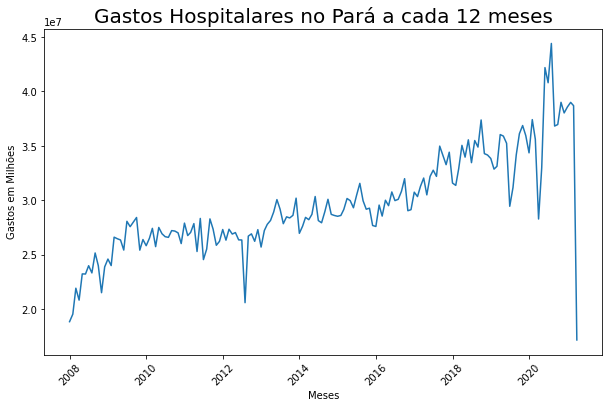

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.lineplot(data = mensal, x = mensal.index, y = "Pará")
plt.xticks(rotation = 45)
plt.xlabel("Meses")
plt.ylabel("Gastos em Milhões")
plt.title("Gastos Hospitalares no Pará a cada 12 meses", fontsize=20)
plt.show()

```
MES     VALOR     ESTADO
```

In [ ]:
mensal_aberto = mensal.reset_index().melt(id_vars = ["index"], value_vars = mensal.columns)
# Retirar o index
# Quando faz o melt tem que definir a coluna que vai permanecer igual

mensal_aberto.columns = ["dia_mes_ano","uf","gastos"]
mensal_aberto["dia_mes_ano"] = mensal_aberto["dia_mes_ano"].astype("datetime64")
mensal_aberto.head()

,dia_mes_ano,uf,gastos
0,2008-01-01,São Paulo,91678473.48
1,2008-02-01,São Paulo,148677526.82
2,2008-03-01,São Paulo,156087269.23
3,2008-04-01,São Paulo,161227125.43
4,2008-05-01,São Paulo,187119397.64


In [ ]:
mensal_aberto["gastos"] = mensal_aberto["gastos"]/1_000_000
mensal_aberto.head()

,dia_mes_ano,uf,gastos
0,2008-01-01,São Paulo,91.68
1,2008-02-01,São Paulo,148.68
2,2008-03-01,São Paulo,156.09
3,2008-04-01,São Paulo,161.23
4,2008-05-01,São Paulo,187.12


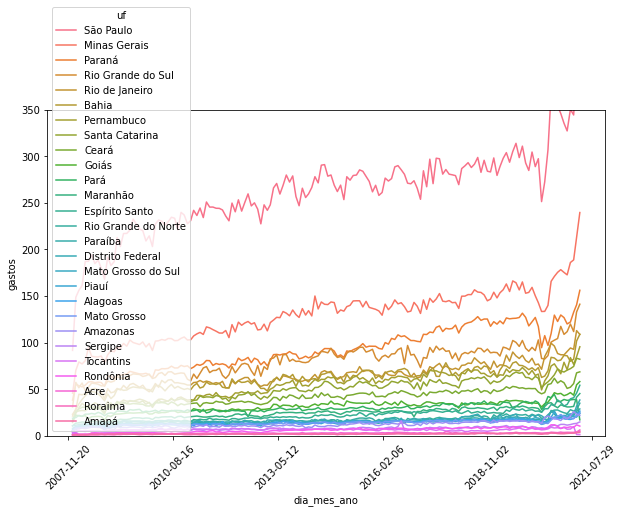

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.lineplot(data = mensal_aberto, x = "dia_mes_ano", y = "gastos", hue = "uf")
plt.xticks(rotation = 45)
plt.ylim(0,350)
ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.show()

## Desafio 01: Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

In [ ]:
display(mensal_aberto["dia_mes_ano"].min())
display(mensal_aberto["dia_mes_ano"].max())

Timestamp('2008-01-01 00:00:00')

Timestamp('2021-04-01 00:00:00')

## Desafio 02: Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

In [ ]:
mensal_original = mensal_aberto.pivot_table(values='gastos', columns='uf', index='dia_mes_ano')
mensal_original.columns.name = None # Remove uf as column name
mensal_original

,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
dia_mes_ano,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-01-01,0.90,6.24,1.12,4.74,21.21,15.54,4.75,5.46,15.31,10.72,4.80,5.38,45.67,38.27,10.72,18.86,14.39,7.99,5.95,30.93,23.03,1.39,0.66,16.50,2.78,91.68,3.44
2008-02-01,1.50,8.38,1.27,7.12,28.19,25.74,7.63,9.10,22.26,13.56,8.68,7.00,70.19,55.38,11.39,19.55,24.18,10.08,9.51,57.36,28.39,2.93,0.78,25.65,3.68,148.68,4.99
2008-03-01,1.79,8.41,0.97,8.20,34.18,28.72,9.65,10.25,21.44,13.99,7.89,8.42,79.23,53.80,12.05,21.94,29.99,10.30,10.35,51.55,44.57,1.54,0.72,26.74,5.05,156.09,6.21
2008-04-01,1.73,9.09,1.14,8.26,39.03,30.68,11.10,11.25,20.92,14.81,8.79,8.80,77.14,52.46,12.65,20.84,34.81,10.78,10.86,56.67,44.05,1.53,0.84,27.18,5.05,161.23,4.98
2008-05-01,1.82,9.34,0.87,7.83,42.95,30.60,12.89,10.20,21.62,14.51,9.23,9.77,80.55,54.42,12.22,23.25,32.15,10.40,11.16,48.40,44.91,1.65,0.86,26.85,4.74,187.12,5.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,3.70,17.81,2.57,17.79,85.88,50.87,22.99,33.67,44.23,30.95,19.58,19.80,172.72,120.04,18.10,38.03,70.99,20.88,23.88,111.76,90.48,8.88,3.45,70.45,11.45,327.18,7.06
2021-01-01,3.72,17.55,2.80,21.52,79.97,52.17,23.53,39.69,46.36,31.02,19.20,22.02,185.99,122.12,19.54,38.58,83.91,22.69,28.06,119.99,94.24,9.63,3.27,72.06,12.06,350.34,7.28
2021-02-01,3.54,18.58,2.82,26.00,82.22,56.06,22.77,40.92,43.58,31.57,18.44,25.20,188.75,132.62,21.52,39.00,76.70,20.73,26.50,111.86,92.86,9.10,3.52,74.46,13.00,344.29,9.85


## Desafio 03: Melhorar o gráfico da distribuição do gráfico:

Escolha apenas alguns estados.
Mude a palete de cores.
Posicione a legenda de forma mais adequada.
Adicione título principal e nos eixos x e y.

In [ ]:
norte = ['Tocantins', 'Pará', 'Amapá', 'Roraima', 'Amazonas', 'Acre', 'Rondônia']
mensal_norte = mensal_aberto[mensal_aberto['uf'].isin(norte)]
mensal_norte

,dia_mes_ano,uf,gastos
1590,2008-01-01,Pará,18.86
1591,2008-02-01,Pará,19.55
1592,2008-03-01,Pará,21.94
1593,2008-04-01,Pará,20.84
1594,2008-05-01,Pará,23.25
...,...,...,...
4288,2020-12-01,Amapá,2.57
4289,2021-01-01,Amapá,2.80
4290,2021-02-01,Amapá,2.82
4291,2021-03-01,Amapá,3.19


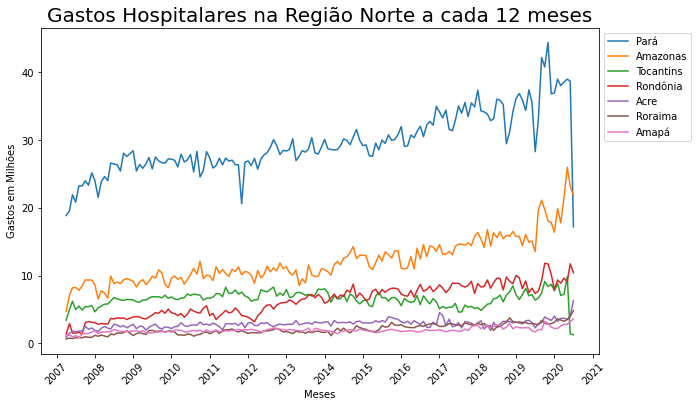

In [ ]:
from matplotlib import dates

plt.figure(figsize = (10,6))
ax = sns.lineplot(data = mensal_norte, x = "dia_mes_ano", y = "gastos", hue="uf")
sns.set_palette(sns.color_palette('rocket_r',7))
plt.xticks(rotation = 45)
plt.xlabel("Meses")
plt.ylabel("Gastos em Milhões")
plt.title("Gastos Hospitalares na Região Norte a cada 12 meses", fontsize=20)
ax.xaxis.set_major_locator(dates.MonthLocator(interval=12))
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))
ax.legend(bbox_to_anchor = (1,1), loc = "upper left")
plt.show()